In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Trips_2018.csv')

In [12]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

# BA Project

## 1 Introduction and Data Analysis

## 1.1 Introduction
Fylde-tekst

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed euismod, nisl eget aliquam ultricies, nunc nisl aliquet nunc, eget aliquam nisl nisl quis nunc.

In [13]:
print("Size of the dataset: ", data.shape)
data.head()

Size of the dataset:  (17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


Above we can see that the dataset has a total of 17548339 and 13 features. Each row is a unique trip and we therefore have 17548339 trips in total. Each trip starts at a certain station and ends at a certain station. The trip duration is the time it takes to get from the start station to the end station. The start and end station is represented by a station id. The start and end station also has a name and a latitude and longitude. We can find the total number of stations and the amount of trips started from that station:

In [14]:
data['start_station_id'].value_counts().reset_index()[:10]

,start_station_id,count
0,519.0,150257
1,497.0,108883
2,435.0,107165
3,402.0,105605
4,426.0,94466
5,285.0,93370
6,477.0,87956
7,490.0,85293
8,499.0,84963
9,293.0,83025


We can also see which bikes are used the most:

In [15]:
data['bikeid'].value_counts().reset_index()[:10]

,bikeid,count
0,30657,2862
1,32124,2728
2,32090,2707
3,32036,2692
4,32541,2681
5,32195,2627
6,32606,2593
7,30692,2584
8,31108,2576
9,30315,2570


The distribution of the duration of the trips is shown below:

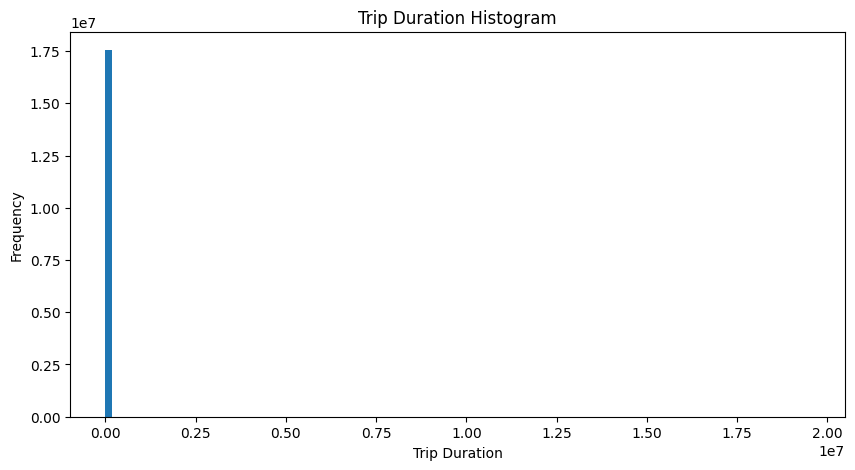

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(data['tripduration'], bins=100)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram')
plt.show()

## 2 Predictive Challenge

For the prediction challenge, you are expected to predict the demand for the bike-sharing
system (number of dropoffs and pickups). You should do the predictions for clusters of
stations. This challenge consists of three tasks:

1. Cluster the stations spatially (nearby departing stations should be grouped together)
in no less than 20 clusters. Tasks 2 and 3 will be based on the results of this
clustering, and analysis should be performed on at least one cluster (e.g., the one
with the largest demand). More is preferable.

2. You are expected to build a prediction model that, at the end of a day, allows to
predict what the demand for a cluster of stations will be over the next 24 hours – i.e.
not the total demand for the next day, but how the time-series of the demand will look like for the next day (e.g., given demand data until midnight of day 1, predict the number of pickups for all 1h intervals [6-7am, 7-8am, ..., 11-12pm] in day 2). You should predict both the arrivals (i.e., bicycle dropoffs) and the departures (pickups). You should use a time aggregation of one hour or less. You can choose to use two
different models or a single one to predict both. It is up to you to decide how to best formulate this problem as a machine learning problem. You should not shuffle the
data. You should instead use the data from January to October (included) to train your model, and the data from November and December as a test set. As a reference, good model should be able to predict the test set with an R2 of at least 0.60. You can use any sklearn regression model you want.

3. Overnight, the bike-sharing company manually repositions their bikes in order to ensure that the demand for the next day can be satisfied. You are expected to use the outputs from the prediction model above to compute the required number of bicycles to be placed in each cluster of stations analyzed in Task 2 at the beginning of the next day. To compute this number, you can use the cumulative of the arrivals and departures. The goal is to ensure that, over the duration of the next day, there will never be a shortage of bikes – or, if there is, the goal is to minimize the number of bikes in deficit. The number of bicycles required can be extrapolated as the maximum difference between departures and arrivals.

In [20]:
# Find unique pairs of start_station_latitude and start_station_longitude
data_copy = data.copy()


Size of the dataset:  (17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
